# Predictive Maintenance Model for Electric Vehicle Charging Stations

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [2]:
# Step 2: Load Data
df = pd.read_csv('../data/charging_station_data.csv')
df.head(10)

,charging_station_id,location,time_of_day,next_maintenance_days,usage_efficiency,maintenance_needed,fault_probability,charging_sessions,total_energy_delivered_kW,last_maintenance_date,charging_duration_hours,temperature,voltage,current,user_feedback
0,1,Location C,Night,269.6,1.0,Software Update,0.06,6,639.842852,2024-10-23 04:54:31.926507,0.994945,17.014549,201.947638,78.460496,3
1,2,Location B,Morning,58.3,1.0,Connector Cleaning,0.03,3,477.459579,2024-03-26 09:02:31.926507,1.726527,25.368145,377.111947,95.831005,2
2,3,Location D,Evening,278.7,1.0,Connector Cleaning,0.07,7,213.178622,2024-11-01 17:17:31.926507,1.602714,19.881696,303.748184,61.473404,4
3,4,Location A,Night,347.8,1.0,Connector Cleaning,0.08,8,205.094803,2025-01-09 12:12:31.926507,0.978393,22.106901,353.341956,45.848011,1
4,5,Location B,Evening,134.5,1.0,Cable Inspection,0.05,5,808.333814,2024-06-10 10:23:31.926507,1.022105,31.624070,266.533409,77.774232,2
5,6,Location B,Morning,246.1,1.0,Connector Cleaning,0.01,1,481.606746,2024-09-30 21:02:31.926507,1.344775,30.099017,350.708015,21.685661,5
6,7,Location D,Morning,198.7,1.0,Cable Inspection,0.07,7,409.361246,2024-08-13 07:28:31.926507,2.078176,29.787015,364.680861,77.626503,1
7,8,Location D,Morning,269.2,1.0,Cable Inspection,0.02,2,148.315445,2024-10-23 19:46:31.926507,1.229520,29.434029,313.526496,62.594972,2
8,9,Location C,Morning,213.3,1.0,Cable Inspection,0.03,3,290.580685,2024-08-28 12:37:31.926507,2.372943,27.981461,392.457433,68.954890,3
9,10,Location D,Afternoon,108.4,1.0,Connector Cleaning,0.04,4,781.446023,2024-05-15 06:07:31.926507,2.030989,26.427897,354.436294,98.573492,1


### Step 3: Data Preprocessing

In [3]:
df.drop(['usage_efficiency'], axis=1, inplace=True)
df

,charging_station_id,location,time_of_day,next_maintenance_days,maintenance_needed,fault_probability,charging_sessions,total_energy_delivered_kW,last_maintenance_date,charging_duration_hours,temperature,voltage,current,user_feedback
0,1,Location C,Night,269.6,Software Update,0.06,6,639.842852,2024-10-23 04:54:31.926507,0.994945,17.014549,201.947638,78.460496,3
1,2,Location B,Morning,58.3,Connector Cleaning,0.03,3,477.459579,2024-03-26 09:02:31.926507,1.726527,25.368145,377.111947,95.831005,2
2,3,Location D,Evening,278.7,Connector Cleaning,0.07,7,213.178622,2024-11-01 17:17:31.926507,1.602714,19.881696,303.748184,61.473404,4
3,4,Location A,Night,347.8,Connector Cleaning,0.08,8,205.094803,2025-01-09 12:12:31.926507,0.978393,22.106901,353.341956,45.848011,1
4,5,Location B,Evening,134.5,Cable Inspection,0.05,5,808.333814,2024-06-10 10:23:31.926507,1.022105,31.624070,266.533409,77.774232,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,Location D,Evening,151.1,Cable Inspection,0.01,1,547.482038,2024-06-27 13:22:31.936115,1.494128,37.168359,230.150753,93.101999,2
4996,4997,Location B,Evening,31.6,Battery Check,0.06,6,899.303434,2024-02-28 04:03:31.936115,1.045090,38.460516,238.927179,32.732615,3
4997,4998,Location C,Morning,9.6,Cable Inspection,0.06,6,860.365210,2024-02-06 23:30:31.936115,1.044914,31.330128,259.029523,68.291319,4
4998,4999,Location D,Night,328.2,Cable Inspection,0.02,2,291.001624,2024-12-21 11:14:31.936115,1.511607,28.042389,365.451959,45.727642,3


In [4]:
# Handle missing values
df = df.dropna()

# Encode categorical variables
le = LabelEncoder()
df['location'] = le.fit_transform(df['location'])
df['maintenance_needed'] = le.fit_transform(df['maintenance_needed'])
df['time_of_day'] = le.fit_transform(df['time_of_day'])

# Convert timestamp to datetime
df['last_maintenance_date'] = pd.to_datetime(df['last_maintenance_date'])

### Step 4: Exploratory Data Analysis (EDA)

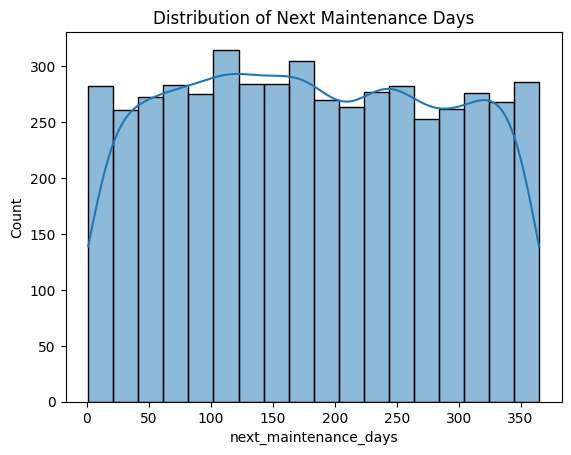

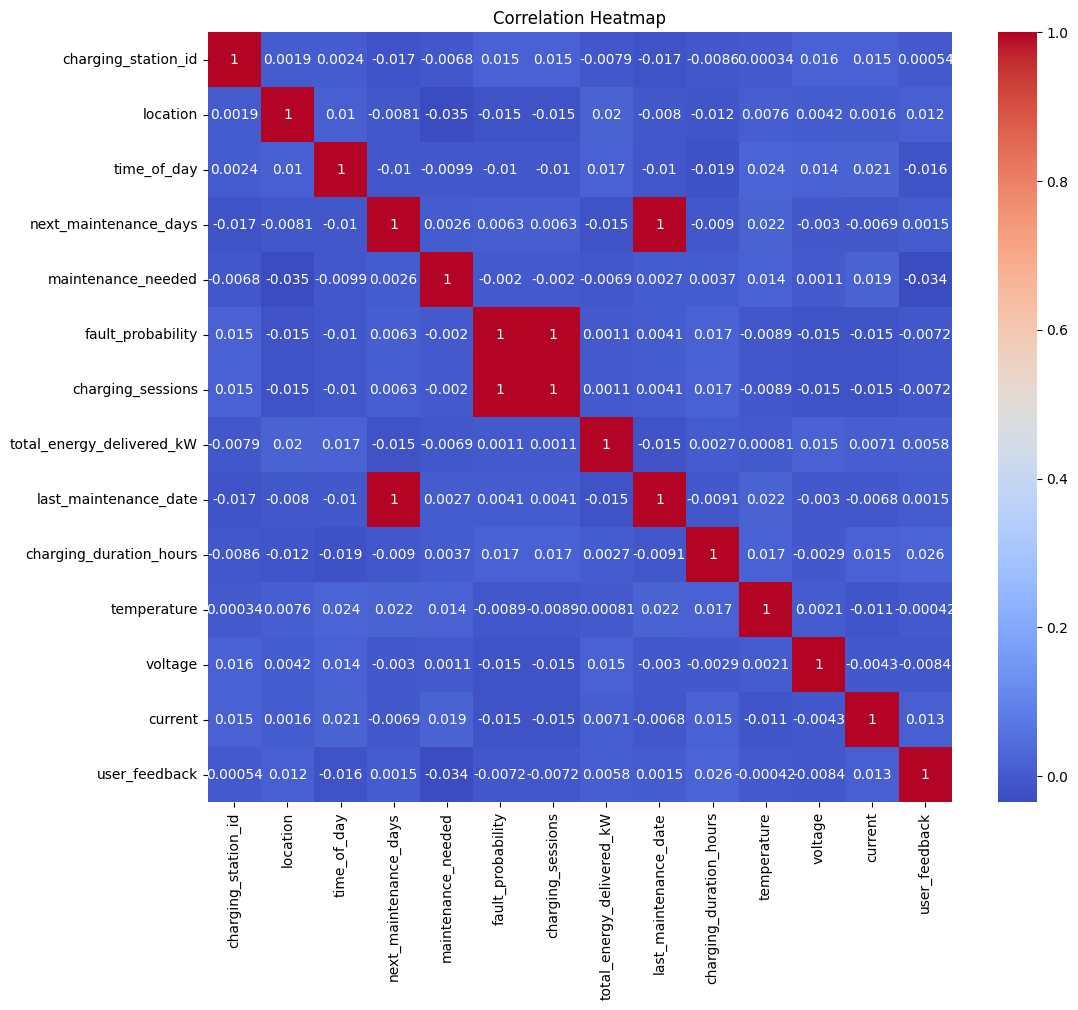

In [5]:
# Distribution of Next Maintenance Days
sns.histplot(df['next_maintenance_days'], kde=True)
plt.title('Distribution of Next Maintenance Days')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Step 4.1: Additional Data Visualization

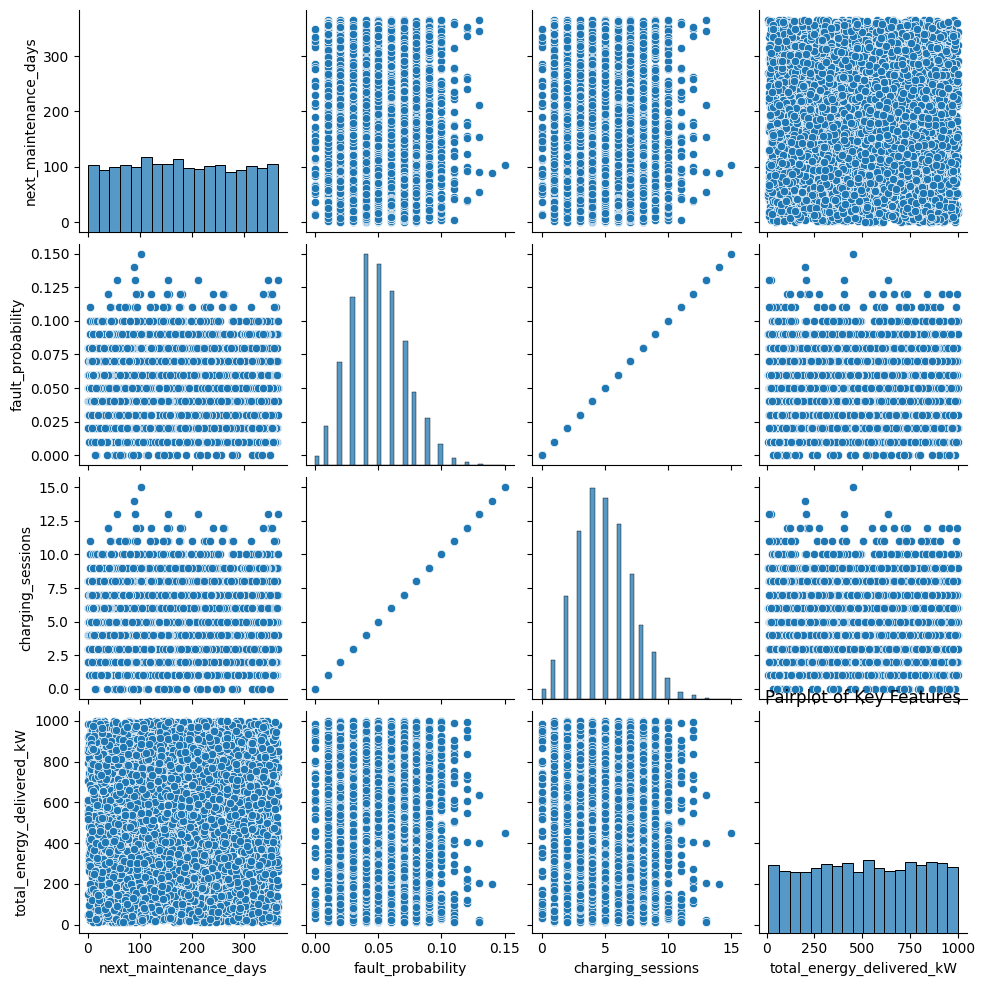

In [6]:
# Pairplot to visualize relationships between features
sns.pairplot(df[['next_maintenance_days', 'fault_probability', 'charging_sessions', 'total_energy_delivered_kW']])
plt.title('Pairplot of Key Features')
plt.show()

### Step 4.2: Feature Distribution by Maintenance Type

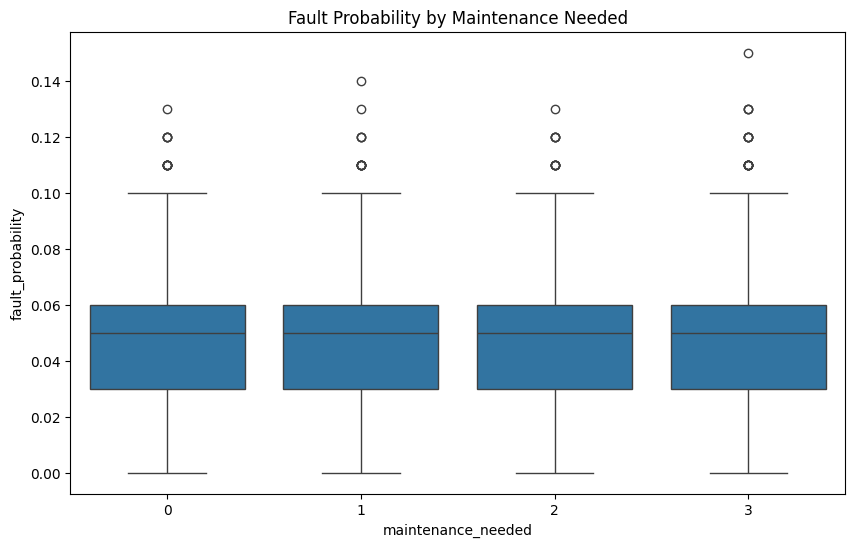

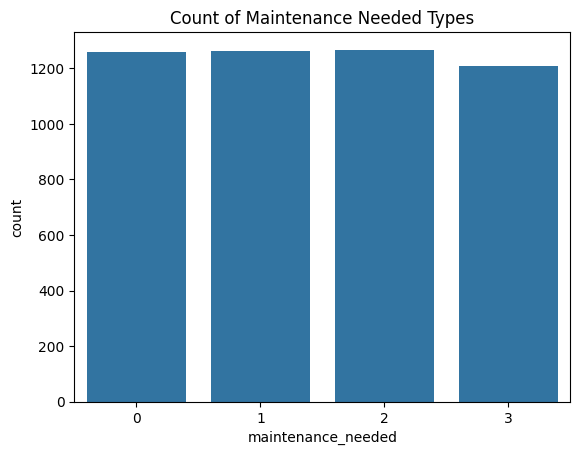

In [7]:
# Boxplot to compare feature distributions based on maintenance_needed
plt.figure(figsize=(10,6))
sns.boxplot(x='maintenance_needed', y='fault_probability', data=df)
plt.title('Fault Probability by Maintenance Needed')
plt.show()

# Countplot for maintenance_needed categories
sns.countplot(x='maintenance_needed', data=df)
plt.title('Count of Maintenance Needed Types')
plt.show()

### Step 5: Feature Selection
Identify the features and target variables.

In [8]:
# Features and Targets
features = df.drop(['next_maintenance_days', 'charging_station_id', 'fault_probability', 'maintenance_needed'], axis=1)
targets = df[['next_maintenance_days', 'maintenance_needed', 'fault_probability']]

In [ ]:
print(features)
print(targets)

### Step 6: Train-Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

### Step 7: Scaling

In [11]:
# Assuming X_train and X_test are DataFrames
datetime_columns = X_train.select_dtypes(include=['datetime64']).columns
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Extract useful components from datetime columns
for col in datetime_columns:
    X_train[col + '_year'] = X_train[col].dt.year
    X_train[col + '_month'] = X_train[col].dt.month
    X_train[col + '_day'] = X_train[col].dt.day
    X_train[col + '_hour'] = X_train[col].dt.hour
    X_test[col + '_year'] = X_test[col].dt.year
    X_test[col + '_month'] = X_test[col].dt.month
    X_test[col + '_day'] = X_test[col].dt.day
    X_test[col + '_hour'] = X_test[col].dt.hour

# Drop the original datetime columns
X_train = X_train.drop(columns=datetime_columns)
X_test = X_test.drop(columns=datetime_columns)

# Update the list of numerical columns to include the new datetime features
numerical_columns = X_train.columns

# Scale only the numerical columns
scaler = StandardScaler()
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled_numerical = scaler.transform(X_test[numerical_columns])

# Convert the scaled numerical data back to DataFrames
X_train_scaled_numerical_df = pd.DataFrame(X_train_scaled_numerical, columns=numerical_columns, index=X_train.index)
X_test_scaled_numerical_df = pd.DataFrame(X_test_scaled_numerical, columns=numerical_columns, index=X_test.index)

### Step 8: Model Selection and Training

In [12]:
# Initialize and train the model for multi-output regression
from sklearn.multioutput import MultiOutputRegressor
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train_scaled_numerical_df, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

### Step 9: Model Evaluation

In [13]:
# Predictions for all targets
y_pred = model.predict(X_test_scaled_numerical_df)

# Evaluation Metrics for each target
for i, target in enumerate(targets.columns):
    mae = mean_absolute_error(y_test[target], y_pred[:, i])
    mse = mean_squared_error(y_test[target], y_pred[:, i])
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test[target], y_pred[:, i])
    
    print(f'--- {target} ---')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    print(f'R² Score: {r2}\n')

--- next_maintenance_days ---
MAE: 0.10576399999999668
RMSE: 0.15347457769937026
R² Score: 0.9999978080563774

--- maintenance_needed ---
MAE: 1.0061900000000001
RMSE: 1.1442169811709666
R² Score: -0.049206583263278425

--- fault_probability ---
MAE: 1.4100000000176866e-05
RMSE: 0.0003239598740584968
R² Score: 0.999783919047572



### Step 10: Hyperparameter Tuning

In [14]:
# Using GridSearchCV for Hyperparameter Tuning with MultiOutputRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled_numerical_df, y_train)

print(f'Best Parameters: {grid_search.best_params_}')

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[CV] END estimator__max_depth=None, estimator__n_estimators=100; total time=   4.7s
[CV] END estimator__max_depth=None, estimator__n_estimators=100; total time=   4.8s
[CV] END estimator__max_depth=None, estimator__n_estimators=100; total time=   4.6s
[CV] END estimator__max_depth=None, estimator__n_estimators=200; total time=   9.3s
[CV] END estimator__max_depth=None, estimator__n_estimators=200; total time=   9.4s
[CV] END estimator__max_depth=None, estimator__n_estimators=200; total time=   9.2s
[CV] END estimator__max_depth=None, estimator__n_estimators=300; total time=  13.8s
[CV] END estimator__max_depth=None, estimator__n_estimators=300; total time=  14.5s
[CV] END estimator__max_depth=10, estimator__n_estimators=100; total time=   4.1s
[CV] END estimator__max_depth=10, estimator__n_estimators=100; total time=   4.0s
[CV] END estimator__max_depth=None, estimator__n_estimators=300; total time=  14.3s
[CV] END estimator__max_depth=10, estimator__n_estimators=100; total time=   3.9

### Step 11: Model Deployment

In [15]:
# Save the model and scaler
joblib.dump(model, '../models/random_forest_model.joblib')
joblib.dump(scaler, '../models/scaler.joblib')

# To load the model later:
# loaded_model = joblib.load('../models/random_forest_model.joblib')
# loaded_scaler = joblib.load('../models/scaler.joblib')

['../models/scaler.joblib']